In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

data = pd.read_csv(r"C:\Users\Ruchir\Downloads\seoul+bike+sharing+demand\SeoulBikeData.csv")
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [176]:
data.drop(['Date','Holiday','Seasons'], inplace=True, axis=1)

In [177]:
data.head()

,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [178]:
data['Functioning Day'] = data['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)

In [179]:
data.drop(['Hour'], inplace=True, axis=1)

In [180]:
data.head()

,Rented Bike Count,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


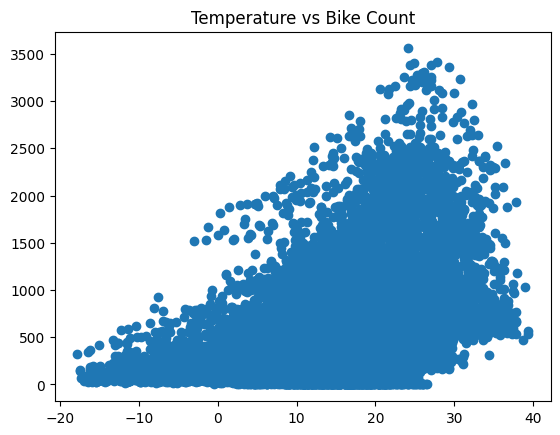

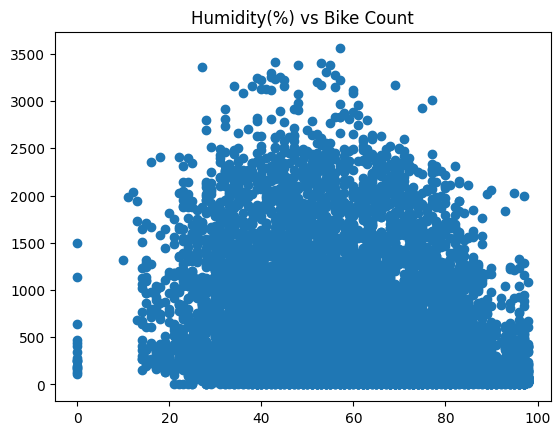

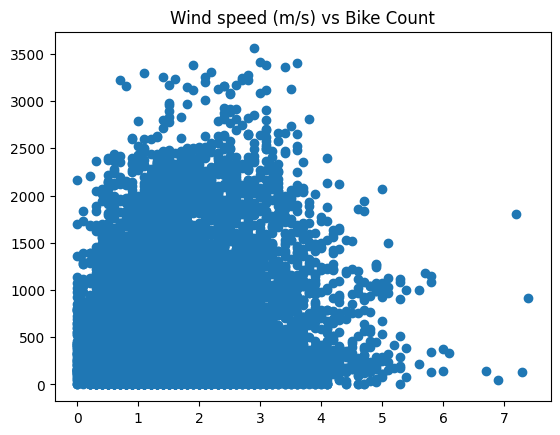

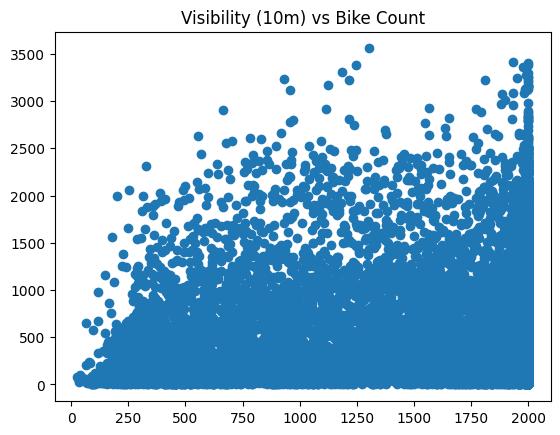

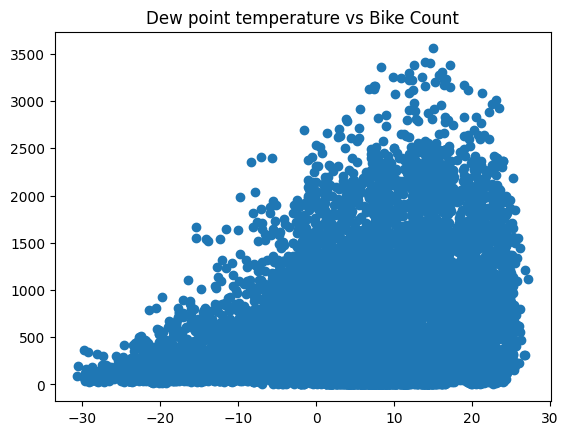

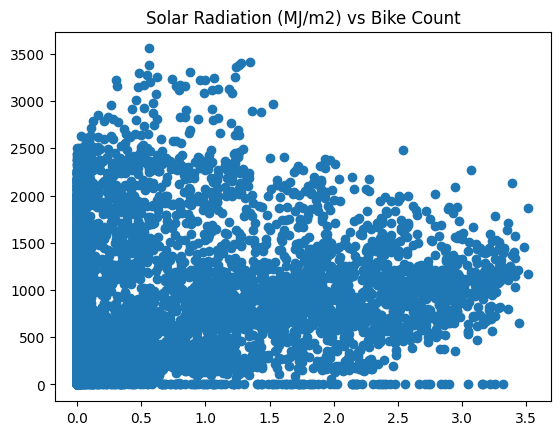

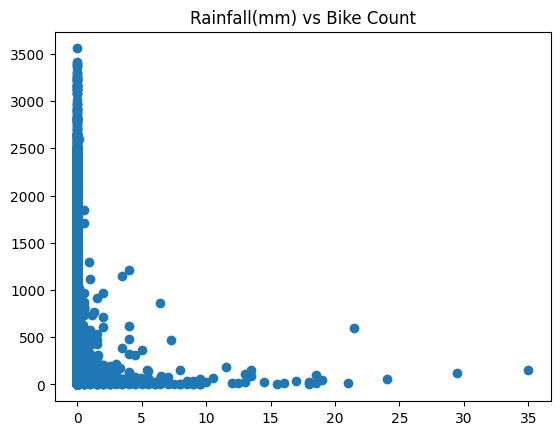

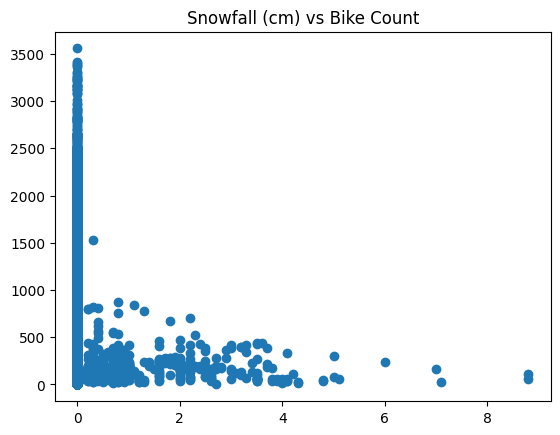

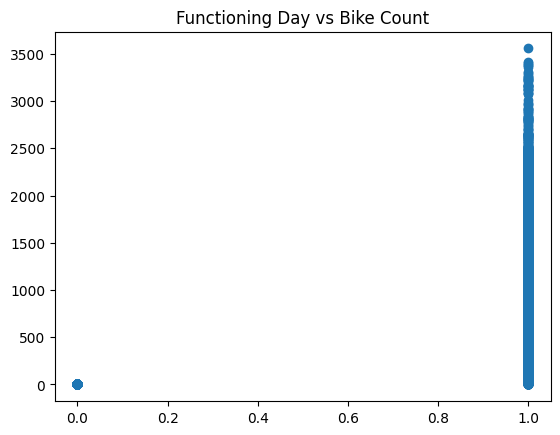

In [181]:
for i in data.columns[1:]:
    plt.scatter(data[i], data['Rented Bike Count'])
    plt.title(f'{i} vs Bike Count')
    plt.show()

In [182]:
data.head()
data.drop(['Wind speed (m/s)', 'Visibility (10m)','Functioning Day'], axis=1, inplace=True)

In [183]:
data.head()

,Rented Bike Count,Temperature,Humidity(%),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


In [184]:
X = data.iloc[:,1:2].values
y = data.iloc[:,0:1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [185]:
X_test

array([[ 1.03465665],
       [ 0.58256273],
       [-1.17558026],
       ...,
       [ 0.82535391],
       [ 1.26907572],
       [ 1.27744783]])

In [186]:
from sklearn.linear_model import LinearRegression

temp_reg = LinearRegression()
temp_reg.fit(X_train, y_train)

LinearRegression()

In [187]:
y_pred = temp_reg.predict(X_test)
y_pred = y_pred.astype(int)

In [188]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f'Mean squared error for test data: {mean_squared_error(y_test, y_pred)}')
print(f'Mean absolute error for test data: {mean_absolute_error(y_test, y_pred)}')

Mean squared error for test data: 278209.4576271186
Mean absolute error for test data: 390.95468695952957


In [189]:
y_pred, y_test

(array([[1071],
        [ 913],
        [ 298],
        ...,
        [ 998],
        [1153],
        [1156]]),
 array([[ 824],
        [ 761],
        [ 161],
        ...,
        [1414],
        [2011],
        [ 340]], dtype=int64))

In [190]:
temp_reg.coef_, temp_reg.intercept_

(array([[349.82132613]]), array([709.29493951]))

In [191]:
temp_reg.score(X_test, y_test)

0.29603440393640545

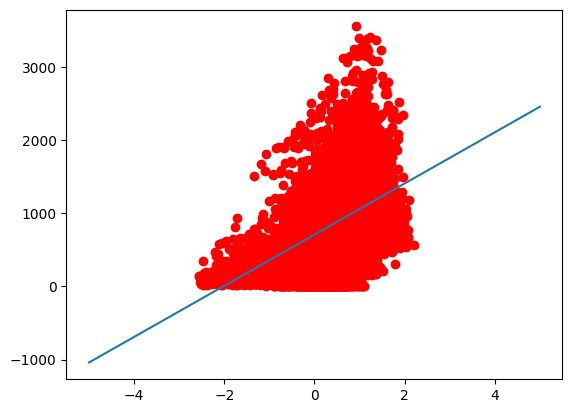

In [192]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

plt.scatter(X_train, y_train, color='red')
x = tf.linspace(-5, 5, 100)
x = np.reshape(x, (-1, 1))
plt.plot(x, temp_reg.predict(x))
plt.show()

In [193]:
X = data.iloc[:,1:2].values
y = data.iloc[:,0:1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

X_train, y_train

(array([[29.3],
        [20.6],
        [23.4],
        ...,
        [28.5],
        [24.4],
        [11.8]]),
 array([[1853],
        [1084],
        [2145],
        ...,
        [ 250],
        [1193],
        [ 173]], dtype=int64))

In [194]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [195]:
y_pred = linear_reg.predict(X_test)

In [196]:
print(f'Mean squared error for test data: {mean_squared_error(y_test, y_pred)}')
print(f'Mean absolute error for test data: {mean_absolute_error(y_test, y_pred)}')

Mean squared error for test data: 310392.7641576693
Mean absolute error for test data: 411.4149796675858


In [197]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [198]:
temp_nn_model = Sequential([
    tf.keras.layers.Dense(1)
])

In [199]:
temp_nn_model.compile(optimizer=Adam(0.01), loss='mean_squared_error')

In [200]:
history = temp_nn_model.fit(X_train, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 880916.6875 - val_loss: 895275.7500
Epoch 2/1000
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 908557.5000 - val_loss: 892337.7500
Epoch 3/1000
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 897596.3125 - val_loss: 889426.3125
Epoch 4/1000
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 915596.3750 - val_loss: 886503.4375
Epoch 5/1000
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 881493.5625 - val_loss: 883593.1875
Epoch 6/1000
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 881417.8750 - val_loss: 880713.1250
Epoch 7/1000
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 944707.0000 - val_loss: 877816.0625
Epoch 8/1000
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 867154.5000 - val_loss: 874959.4375
Epoch 9/1000
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 856296.0625 - val_loss: 872110.3125
Epoch 10/1000
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 868442.4375 - val_loss: 869231.5000
Epoch 11/1000


C:\Users\Ruchir\AppData\Local\Temp\ipykernel_4640\1375044375.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


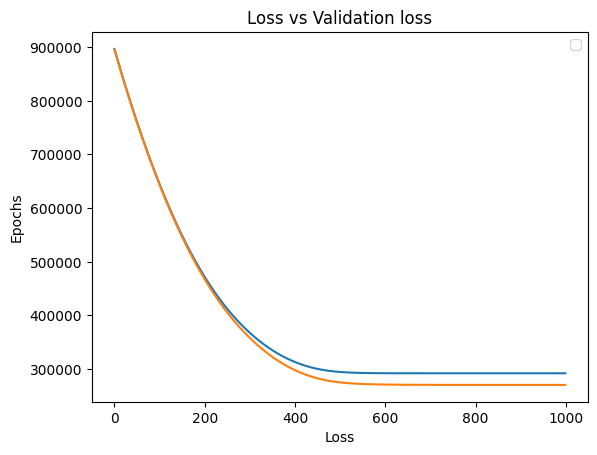

In [201]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Validation loss')
plt.legend()
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.show()

In [202]:
y_pred = temp_nn_model.predict(X_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step


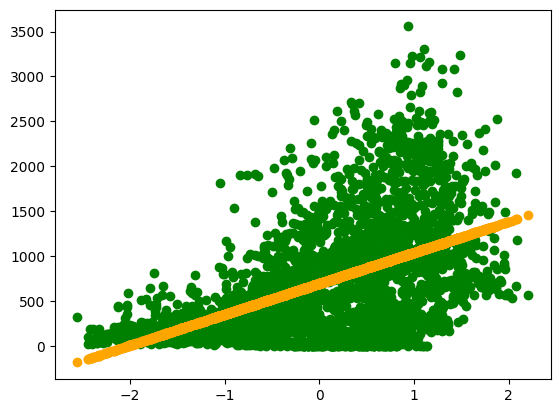

In [203]:
plt.scatter(X_test, y_test, color='green')
plt.scatter(X_test, y_pred, color='orange')

In [204]:
X = data.iloc[:,1:2].values
y = data.iloc[:,0:1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [205]:
nn_model = Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=Adam(0.01), loss='mean_squared_error')

In [206]:
history = nn_model.fit(
    X_train, 
    y_train,
    epochs=100,
    validation_split=0.35,
)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 646160.0625 - val_loss: 300170.0625
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 299227.0000 - val_loss: 302076.3438
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 301988.7812 - val_loss: 299107.7812
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 293326.6250 - val_loss: 296315.8438
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 311806.4375 - val_loss: 301532.7500
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 296721.3125 - val_loss: 294996.1875
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 312245.4062 - val_loss: 295398.8438
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 295347.8438 - val_loss: 300939.9688
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 301514.5938 - val_loss: 295797.5312
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 288756.2500 - val_loss: 296486.8438
Epoch 11/100
120/120 ━━━━━━━━

C:\Users\Ruchir\AppData\Local\Temp\ipykernel_4640\1375044375.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


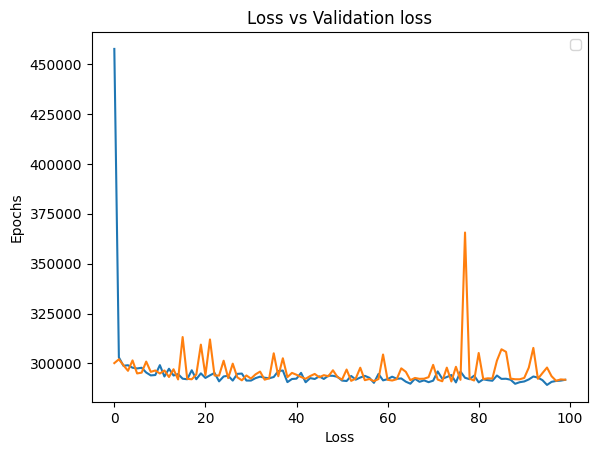

In [207]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Validation loss')
plt.legend()
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


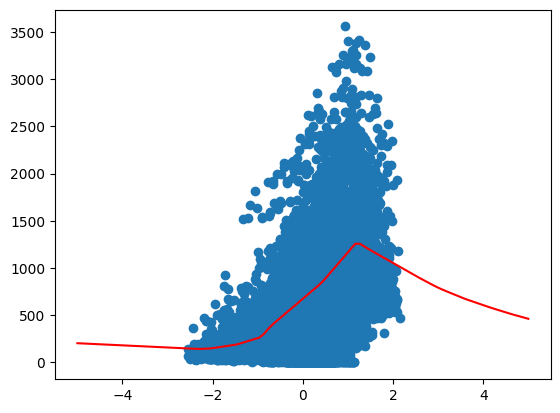

In [208]:
plt.scatter(X_train, y_train, label='Data')
x = tf.linspace(-5,5,100)
plt.plot(x, nn_model.predict(np.reshape(x,(-1,1))), color='red')
plt.show()